# Data Cleaning
We will load in the relevant files for inspection and carry out a number of data manipulations and processes to understand, analyse and format our data into a single source for our clustering algorithm.

## Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Import

Our data is split across 12 files.
These are split into trials of length 95, length 100 and length 150.
The wi_95 file contains all wins from the 95 trials for each subject, lo_95 contains the losses, index_95 contains which study each subject relates to and choice_95 details what deck each subject chose across each trial.

These files contain data from 617 healthy subjects who have participated in the Iowa Gambling Task. These participants are split accross 10 independant studies with a variety of participants and length of trial:

| Study              | Participants | Trials |
| :--                | ------------ | ------ |
| Fridberg et al.	 |  15          |      95|	
| Horstmannb         | 162          |     100|	
| Kjome et al.	     |  19	        |     100|	
| Maia & McClelland  |  40	        |     100|		
| Premkumar et al. 	 |  25	        |     100|	
| Steingroever et al.| 70	        |     100|	
| Steingroever et al.| 57	        |     150|	
| Wetzels et al. 	 | 41	        |     150|
| Wood et al.	     |153	        |     100|	
| Worthy et al.      | 35           |     100|

In [4]:
#import raw data into dataframes
wi_95 = pd.read_csv('../data/wi_95.csv')
wi_100 = pd.read_csv('../data/wi_100.csv')
wi_150 = pd.read_csv('../data/wi_150.csv')
lo_95 = pd.read_csv('../data/lo_95.csv')
lo_100 = pd.read_csv('../data/lo_100.csv')
lo_150 = pd.read_csv('../data/lo_150.csv')
index_95 = pd.read_csv('../data/index_95.csv')
index_100 = pd.read_csv('../data/index_100.csv')
index_150 = pd.read_csv('../data/index_150.csv')
choice_95 = pd.read_csv('../data/choice_95.csv')
choice_100 = pd.read_csv('../data/choice_100.csv')
choice_150 = pd.read_csv('../data/choice_150.csv')

## Inspection of the raw data

In [5]:
#Display wins
wi_95.head()

,Wins_1,Wins_2,Wins_3,Wins_4,Wins_5,Wins_6,Wins_7,Wins_8,Wins_9,Wins_10,...,Wins_86,Wins_87,Wins_88,Wins_89,Wins_90,Wins_91,Wins_92,Wins_93,Wins_94,Wins_95
Subj_1,100,100,100,100,100,100,100,100,100,100,...,50,50,50,50,50,50,50,50,50,50
Subj_2,100,100,50,100,100,100,100,100,100,100,...,50,100,100,100,100,100,50,50,50,50
Subj_3,50,50,50,100,100,100,100,100,100,100,...,100,100,100,50,50,50,50,50,50,50
Subj_4,50,50,100,100,100,100,100,50,100,100,...,100,50,50,50,50,50,50,50,50,50
Subj_5,100,100,50,50,50,100,100,100,100,100,...,50,50,50,50,50,50,50,50,50,50


In [6]:
#Display losses
lo_95.head()

,Losses_1,Losses_2,Losses_3,Losses_4,Losses_5,Losses_6,Losses_7,Losses_8,Losses_9,Losses_10,...,Losses_86,Losses_87,Losses_88,Losses_89,Losses_90,Losses_91,Losses_92,Losses_93,Losses_94,Losses_95
Subj_1,0,0,0,0,0,0,0,0,-1250,0,...,0,0,0,0,0,0,0,-250,0,0
Subj_2,0,0,0,0,0,0,0,0,0,0,...,-50,-300,0,-350,0,0,0,0,0,-25
Subj_3,0,0,0,0,0,0,0,-150,0,0,...,0,0,0,0,0,0,-250,0,0,0
Subj_4,0,0,0,0,-150,0,0,0,0,0,...,0,-50,0,-50,-50,0,-25,0,0,0
Subj_5,0,0,0,0,0,0,-150,0,0,0,...,-75,0,0,0,0,0,0,0,0,0


In [7]:
#Display index
index_95.head()

,Subj,Study
0,1,Fridberg
1,2,Fridberg
2,3,Fridberg
3,4,Fridberg
4,5,Fridberg


In [8]:
#Display choices
choice_95.head()

,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9,Choice_10,...,Choice_86,Choice_87,Choice_88,Choice_89,Choice_90,Choice_91,Choice_92,Choice_93,Choice_94,Choice_95
Subj_1,2,2,2,2,2,2,2,2,2,1,...,4,4,4,4,4,4,4,4,4,4
Subj_2,1,2,3,2,2,2,2,2,2,2,...,3,1,1,1,2,2,3,4,4,3
Subj_3,3,4,3,2,2,1,1,1,1,2,...,2,2,2,4,4,4,4,4,4,4
Subj_4,4,3,1,1,1,2,2,3,2,2,...,2,3,3,3,3,3,3,4,4,4
Subj_5,1,2,3,4,3,1,1,2,2,2,...,3,3,4,4,3,4,4,4,4,4


# Data manipulations

We want to consolidate the data into a single dataframe with certain features. The first step is to aggregate the choices for all subjects into single columns for each card deck.

In [9]:
#Count values for each choice by deck
agg_choice_95 = choice_95.apply(pd.Series.value_counts, axis=1)

agg_choice_100 = choice_100.apply(pd.Series.value_counts, axis=1)

agg_choice_150 = choice_150.apply(pd.Series.value_counts, axis=1)

In [10]:
#Display aggregated choice data
agg_choice_95.head()

,1,2,3,4
Subj_1,12,9,3,71
Subj_2,24,26,12,33
Subj_3,12,35,10,38
Subj_4,11,34,12,38
Subj_5,10,24,15,46


We add columns labelled with the total wins and total losses for each subject calculated from the wins and losses raw data we previously imported

In [11]:
#calculate total wins and total losses for each subject
agg_choice_95["tot_win"] = wi_95.sum(axis=1)
agg_choice_95["tot_los"] = lo_95.sum(axis=1)

agg_choice_100["tot_win"] = wi_100.sum(axis=1)
agg_choice_100["tot_los"] = lo_100.sum(axis=1)

agg_choice_150["tot_win"] = wi_150.sum(axis=1)
agg_choice_150["tot_los"] = lo_150.sum(axis=1)

#resetting index for concatination in the next cell
agg_choice_95.reset_index(inplace=True)
agg_choice_100.reset_index(inplace=True)
agg_choice_150.reset_index(inplace=True)

We then add the index dataframe so as to know which Study each subject is from

In [12]:
agg_choice_95.head()

,index,1,2,3,4,tot_win,tot_los
0,Subj_1,12,9,3,71,5800,-4650
1,Subj_2,24,26,12,33,7250,-7925
2,Subj_3,12,35,10,38,7100,-7850
3,Subj_4,11,34,12,38,7000,-7525
4,Subj_5,10,24,15,46,6450,-6350


In [13]:
#Concatenate index to identify the study
final_95 = pd.concat([agg_choice_95, index_95], axis=1)
final_100 = pd.concat([agg_choice_100, index_100], axis=1)
final_150 = pd.concat([agg_choice_150, index_150], axis=1)

We inspect the new dataframes to see if our aggregation has created any null values

In [14]:
final_95.head()

,index,1,2,3,4,tot_win,tot_los,Subj,Study
0,Subj_1,12,9,3,71,5800,-4650,1,Fridberg
1,Subj_2,24,26,12,33,7250,-7925,2,Fridberg
2,Subj_3,12,35,10,38,7100,-7850,3,Fridberg
3,Subj_4,11,34,12,38,7000,-7525,4,Fridberg
4,Subj_5,10,24,15,46,6450,-6350,5,Fridberg


In [15]:
#Display summary info for our data types accross the three dataframes we have created
final_95.info()
final_100.info()
final_150.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    15 non-null     object
 1   1        15 non-null     int64 
 2   2        15 non-null     int64 
 3   3        15 non-null     int64 
 4   4        15 non-null     int64 
 5   tot_win  15 non-null     int64 
 6   tot_los  15 non-null     int64 
 7   Subj     15 non-null     int64 
 8   Study    15 non-null     object
dtypes: int64(7), object(2)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    504 non-null    object
 1   1        504 non-null    int64 
 2   2        504 non-null    int64 
 3   3        504 non-null    int64 
 4   4        504 non-null    int64 
 5   tot_win  504 non-null    int64 
 6   tot_los  504 non-null    int64 
 7  

Further inspection of these null values may show us an insight into some participants choices in this task

In [16]:
sample = final_150[final_150[1].isnull()]
sample.head(2)

,index,1,2,3,4,tot_win,tot_los,Subj,Study
7,Subj_8,NaN,NaN,150.0,NaN,7500,-3750,8,Steingroever2011
56,Subj_57,NaN,NaN,150.0,NaN,7500,-3750,57,Steingroever2011


## Note

Interestingly this step has shown that two participants, both from the Steingroever2011 study chose the same deck for 150 consecutive trials. It would be interesting to know whether this was a tactical choice with prior knowledge of how the Iowa gambling task is set up - i.e. with decks 3 and 4 giving the best returns. This may have also been a tactic to quickly finish the game from a participant who was uninterested in the game itself.

We replace these cells marked as Null with 0 across the data

In [17]:
#replace all NaN values with '0'
final_150[1] = final_150[1].fillna(0)
final_150[2] = final_150[2].fillna(0)
final_150[4] = final_150[4].fillna(0)

We change all columns to type int from type float

In [18]:
#convert float to int
final_150[1] = final_150[1].astype(int)
final_150[2] = final_150[2].astype(int)
final_150[3] = final_150[3].astype(int)
final_150[4] = final_150[4].astype(int)

We then bring all three dataframes together:
- Trials of length 95
- Trials of length 100
- Trials of length 150

In [19]:
#creation of a single dataframe with all 617 subjects accross all studies
temp = final_95.append(final_100)
final = temp.append(final_150)
final

,index,1,2,3,4,tot_win,tot_los,Subj,Study
0,Subj_1,12,9,3,71,5800,-4650,1,Fridberg
1,Subj_2,24,26,12,33,7250,-7925,2,Fridberg
2,Subj_3,12,35,10,38,7100,-7850,3,Fridberg
3,Subj_4,11,34,12,38,7000,-7525,4,Fridberg
4,Subj_5,10,24,15,46,6450,-6350,5,Fridberg
...,...,...,...,...,...,...,...,...,...
93,Subj_94,24,69,13,44,12150,-11850,94,Wetzels
94,Subj_95,5,31,46,68,9300,-7150,95,Wetzels
95,Subj_96,18,19,37,76,9350,-7900,96,Wetzels
96,Subj_97,25,30,44,51,10250,-9050,97,Wetzels


We add a column with a unique ID for each of the 617 participants. We also calculate the balance for each participant after the completion of their trials.

In [20]:
#calculate balance and add Unique ID for participants
final['Unique_ID'] = (np.arange(len(final))+1)
final["balance"] = final["tot_win"] + final["tot_los"]
final

,index,1,2,3,4,tot_win,tot_los,Subj,Study,Unique_ID,balance
0,Subj_1,12,9,3,71,5800,-4650,1,Fridberg,1,1150
1,Subj_2,24,26,12,33,7250,-7925,2,Fridberg,2,-675
2,Subj_3,12,35,10,38,7100,-7850,3,Fridberg,3,-750
3,Subj_4,11,34,12,38,7000,-7525,4,Fridberg,4,-525
4,Subj_5,10,24,15,46,6450,-6350,5,Fridberg,5,100
...,...,...,...,...,...,...,...,...,...,...,...
93,Subj_94,24,69,13,44,12150,-11850,94,Wetzels,613,300
94,Subj_95,5,31,46,68,9300,-7150,95,Wetzels,614,2150
95,Subj_96,18,19,37,76,9350,-7900,96,Wetzels,615,1450
96,Subj_97,25,30,44,51,10250,-9050,97,Wetzels,616,1200


## Add Payoff to Dataframe

In [22]:
data = [['Fridberg', 1],['Horstmann', 2],['Kjome', 3],['Maia', 1],['SteingroverInPrep', 2],['Premkumar', 3],['Wood', 3],['Worthy', 1],['Steingroever2011', 2],['Wetzels', 2]]
 
# Create the pandas DataFrame
payoff = pd.DataFrame(data, columns = ['Study', 'Payoff'])
 
# print dataframe.
payoff


,Study,Payoff
0,Fridberg,1
1,Horstmann,2
2,Kjome,3
3,Maia,1
4,SteingroverInPrep,2
5,Premkumar,3
6,Wood,3
7,Worthy,1
8,Steingroever2011,2
9,Wetzels,2


Join final dataframe with the dataframe containing the payoff values

In [25]:
final = final.join(payoff.set_index('Study'), on='Study')

ValueError: columns overlap but no suffix specified: Index(['Payoff'], dtype='object')

## Export data

This final dataframe will be used as the input for the clustering 

In [26]:
final.to_csv('../data/cleaned_data.csv')

## Graphical representation of the data

We want to further understand the data set to see if there are any insights or trends that we can explore during our clustering. A number of graphs can help us to understand the make up of this data and what questions we want to answer within this project

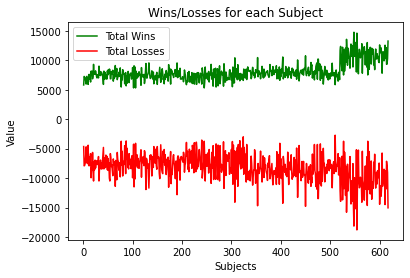

In [366]:
#Plot total wins and losses
plt.plot(final["Unique_ID"], final["tot_win"], label = "Total Wins", color="g")
plt.plot(final["Unique_ID"], final["tot_los"], label = "Total Losses", color="r")

plt.xlabel("Subjects")
plt.ylabel("Value")
plt.legend()
plt.title("Wins/Losses for each Subject")
plt.show()



There seems to be a natural distribution across all subjects. There is a clear increase in profits and losses from subjects 500 onwards which corresponds to their trials being of length 150 and hence a greater chance to increase their profits but also to increase their losses.

In [367]:
#Plot trendline for wins
#trend_w = np.polyfit(final["Unique_ID"], final["tot_win"], 1)
#w = np.poly1d(trend_w)
#plt.plot(final["Unique_ID"], w(final["Unique_ID"]), "r--")
#Plot trendline for losses
#trend_l = np.polyfit(final["Unique_ID"], final["tot_los"], 1)
#l = np.poly1d(trend_l)
#plt.plot(final["Unique_ID"], l(final["Unique_ID"]), "r--")

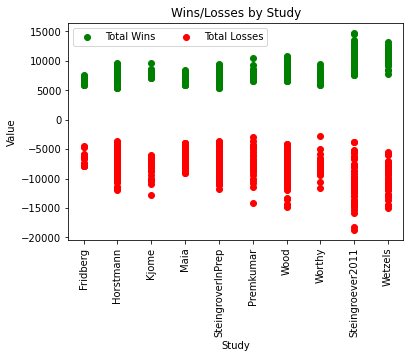

In [368]:
#Show wins and losses by Study
plt.scatter(final["Study"], final["tot_win"], label = "Total Wins", color="g")
plt.scatter(final["Study"], final["tot_los"], label = "Total Losses", color="r")

plt.xticks(rotation=90)
plt.legend(ncol=2)
plt.title("Wins/Losses by Study")
plt.xlabel("Study")
plt.ylabel("Value")
plt.show()

Steingroever2011 and Wetzels, as the only studies with trials of length 150, show the greatest variety in wins and losses across their participants. The Fridberg study group shows limited wins but limited losses also. This group has 15 participants so this may be a factor although Kjome shows a wider variety of wins and losses with 19 participants.  

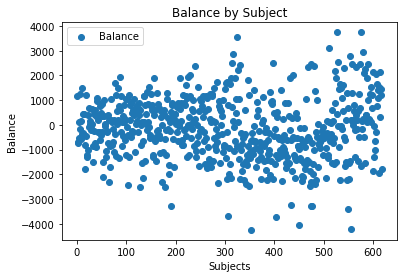

In [369]:
plt.scatter(final["Unique_ID"], final["balance"], label = "Balance")
plt.title("Balance by Subject")
plt.xlabel("Subjects")
plt.ylabel("Balance")
plt.legend()
plt.show()

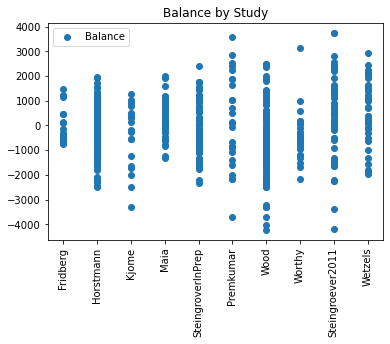

In [370]:
#show balance by study
plt.scatter(final["Study"], final["balance"], label = "Balance")
plt.xticks(rotation=90)
plt.legend()
plt.title("Balance by Study")
plt.show()

Steingroever2011, Wood and Premkumar show the widest variety in terms of positive and negative balance of its participants. Fridberg and Kjome again vary despite their similar small group size. We can also see that the two participants from Steingroever2011 which chose deck 3 150 times had the greatest profit of 3,750 amongst all participants.

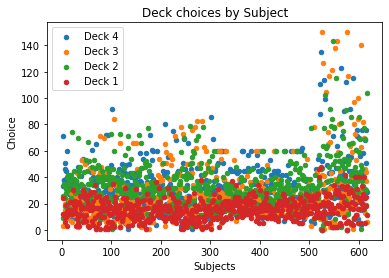

In [371]:
plt.scatter(final["Unique_ID"], final[4], label = "Deck 4", s=20)
plt.scatter(final["Unique_ID"], final[3], label = "Deck 3", s=20)
plt.scatter(final["Unique_ID"], final[2], label = "Deck 2", s=20)
plt.scatter(final["Unique_ID"], final[1], label = "Deck 1", s=20)


plt.title("Deck choices by Subject")
plt.xlabel("Subjects")
plt.ylabel("Choice")
plt.legend()
plt.show()

We can see above the tendency of participants to choice Decks 2/3/4 more than 60 times where deck 1 was never chosen this many times by any participant. Some participants, across all studies have chosen the same deck close to 100% of their trials.

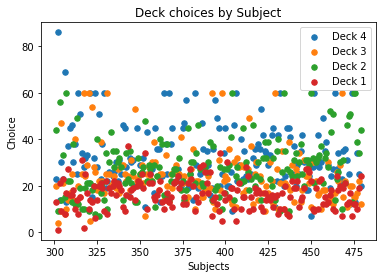

In [341]:
filter1 = final["Unique_ID"]>300
filter2 = final["Unique_ID"]<480
final.where(filter1&filter2, inplace=True)
final
plt.scatter(final["Unique_ID"], final[4], label = "Deck 4", s=30)
plt.scatter(final["Unique_ID"], final[3], label = "Deck 3", s=30)
plt.scatter(final["Unique_ID"], final[2], label = "Deck 2", s=30)
plt.scatter(final["Unique_ID"], final[1], label = "Deck 1", s=30)

plt.title("Deck choices by Subject")
plt.xlabel("Subjects")
plt.ylabel("Choice")
plt.legend()
plt.show()

Further inspection on a subset of participants shows an unusual trend to choose a specific deck exactly 60 times. This is across decks 2/3/4 but again deck 1 is neglected in this. This may have been a stipulation of the study that no deck was allowed to be chosen more than 60 times.

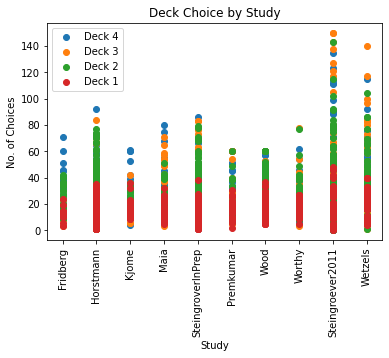

In [377]:
plt.scatter(final["Study"], final[4], label = "Deck 4")
plt.scatter(final["Study"], final[3], label = "Deck 3")
plt.scatter(final["Study"], final[2], label = "Deck 2")
plt.scatter(final["Study"], final[1], label = "Deck 1")
plt.xticks(rotation=90)
plt.legend()
plt.title("Deck Choice by Study")
plt.xlabel("Study")
plt.ylabel("No. of Choices")
plt.show()

In [78]:
agg_95 = choice_95.apply(pd.Series.value_counts, axis=0)

agg_100 = choice_100.apply(pd.Series.value_counts, axis=0)

agg_150 = choice_150.apply(pd.Series.value_counts, axis=0)
choice_95

,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9,Choice_10,...,Choice_86,Choice_87,Choice_88,Choice_89,Choice_90,Choice_91,Choice_92,Choice_93,Choice_94,Choice_95
Subj_1,2,2,2,2,2,2,2,2,2,1,...,4,4,4,4,4,4,4,4,4,4
Subj_2,1,2,3,2,2,2,2,2,2,2,...,3,1,1,1,2,2,3,4,4,3
Subj_3,3,4,3,2,2,1,1,1,1,2,...,2,2,2,4,4,4,4,4,4,4
Subj_4,4,3,1,1,1,2,2,3,2,2,...,2,3,3,3,3,3,3,4,4,4
Subj_5,1,2,3,4,3,1,1,2,2,2,...,3,3,4,4,3,4,4,4,4,4
Subj_6,1,2,1,2,1,2,2,4,3,4,...,4,4,4,3,4,4,4,4,4,4
Subj_7,1,2,3,4,4,3,2,1,2,1,...,4,4,1,1,4,4,4,4,2,4
Subj_8,4,2,1,3,2,3,1,2,1,2,...,4,2,3,4,2,4,4,4,4,4
Subj_9,1,2,1,2,3,4,1,4,4,3,...,4,2,4,2,2,4,2,4,3,2
Subj_10,4,2,2,1,3,1,2,4,4,4,...,4,3,4,4,4,4,4,4,4,3


In [79]:
agg_95

,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9,Choice_10,...,Choice_86,Choice_87,Choice_88,Choice_89,Choice_90,Choice_91,Choice_92,Choice_93,Choice_94,Choice_95
1,8,1,4,3,3,4,6.0,4,3,2,...,NaN,1,2,2,2,NaN,NaN,NaN,1,1
2,1,10,2,5,5,7,8.0,7,8,7,...,3.0,6,2,4,4,4.0,3.0,2.0,2,2
3,2,2,7,2,3,2,1.0,1,2,3,...,2.0,4,3,3,2,1.0,3.0,3.0,3,4
4,4,2,2,5,4,2,NaN,3,2,3,...,10.0,4,8,6,7,10.0,9.0,10.0,9,8


In [80]:
agg_95 = agg_95.fillna(0)
agg_95["Deck"] = (np.arange(len(agg_95))+1)

In [108]:
agg_95 = agg_95.fillna(0)
agg_95["Deck"] = (np.arange(len(agg_95))+1)
agg_95 = agg_95.pivot(columns='Deck', values=['Choice_1', 'Choice_2', 'Choice_3', 'Choice_4', 'Choice_5', 'Choice_6',
       'Choice_7', 'Choice_8', 'Choice_9', 'Choice_10', 'Choice_11',
       'Choice_12', 'Choice_13', 'Choice_14', 'Choice_15', 'Choice_16',
       'Choice_17', 'Choice_18', 'Choice_19', 'Choice_20', 'Choice_21',
       'Choice_22', 'Choice_23', 'Choice_24', 'Choice_25', 'Choice_26',
       'Choice_27', 'Choice_28', 'Choice_29', 'Choice_30', 'Choice_31',
       'Choice_32', 'Choice_33', 'Choice_34', 'Choice_35', 'Choice_36',
       'Choice_37', 'Choice_38', 'Choice_39', 'Choice_40', 'Choice_41',
       'Choice_42', 'Choice_43', 'Choice_44', 'Choice_45', 'Choice_46',
       'Choice_47', 'Choice_48', 'Choice_49', 'Choice_50', 'Choice_51',
       'Choice_52', 'Choice_53', 'Choice_54', 'Choice_55', 'Choice_56',
       'Choice_57', 'Choice_58', 'Choice_59', 'Choice_60', 'Choice_61',
       'Choice_62', 'Choice_63', 'Choice_64', 'Choice_65', 'Choice_66',
       'Choice_67', 'Choice_68', 'Choice_69', 'Choice_70', 'Choice_71',
       'Choice_72', 'Choice_73', 'Choice_74', 'Choice_75', 'Choice_76',
       'Choice_77', 'Choice_78', 'Choice_79', 'Choice_80', 'Choice_81',
       'Choice_82', 'Choice_83', 'Choice_84', 'Choice_85', 'Choice_86',
       'Choice_87', 'Choice_88', 'Choice_89', 'Choice_90', 'Choice_91',
       'Choice_92', 'Choice_93', 'Choice_94', 'Choice_95'])
agg_95


Choice_1                Choice_2                 Choice_3       ...  \
Deck        1    2    3    4        1     2    3    4        1    2  ...   
1         8.0  NaN  NaN  NaN      1.0   NaN  NaN  NaN      4.0  NaN  ...   
2         NaN  1.0  NaN  NaN      NaN  10.0  NaN  NaN      NaN  2.0  ...   
3         NaN  NaN  2.0  NaN      NaN   NaN  2.0  NaN      NaN  NaN  ...   
4         NaN  NaN  NaN  4.0      NaN   NaN  NaN  2.0      NaN  NaN  ...   

     Choice_93       Choice_94                Choice_95                 
Deck         3     4         1    2    3    4         1    2    3    4  
1          NaN   NaN       1.0  NaN  NaN  NaN       1.0  NaN  NaN  NaN  
2          NaN   NaN       NaN  2.0  NaN  NaN       NaN  2.0  NaN  NaN  
3          3.0   NaN       NaN  NaN  3.0  NaN       NaN  NaN  4.0  NaN  
4          NaN  10.0       NaN  NaN  NaN  9.0       NaN  NaN  NaN  8.0  

[4 rows x 380 columns]